In [2]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from keras.preprocessing import image

In [3]:
train_dir = "train"
test_dir = "validation"

In [4]:
train_datagen = ImageDataGenerator(
                width_shift_range=0.1,
                height_shift_range=0.1,
                horizontal_flip=True,
                rescale=1./255,
                validation_split=0.2
                )
validation_datagen = ImageDataGenerator(
                rescale=1./255,
                validation_split=0.2
                )

In [5]:
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(48,48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="training"
    )
validation_generator = validation_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(48,48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="validation")

Found 1522 images belonging to 2 classes.
Found 432 images belonging to 2 classes.


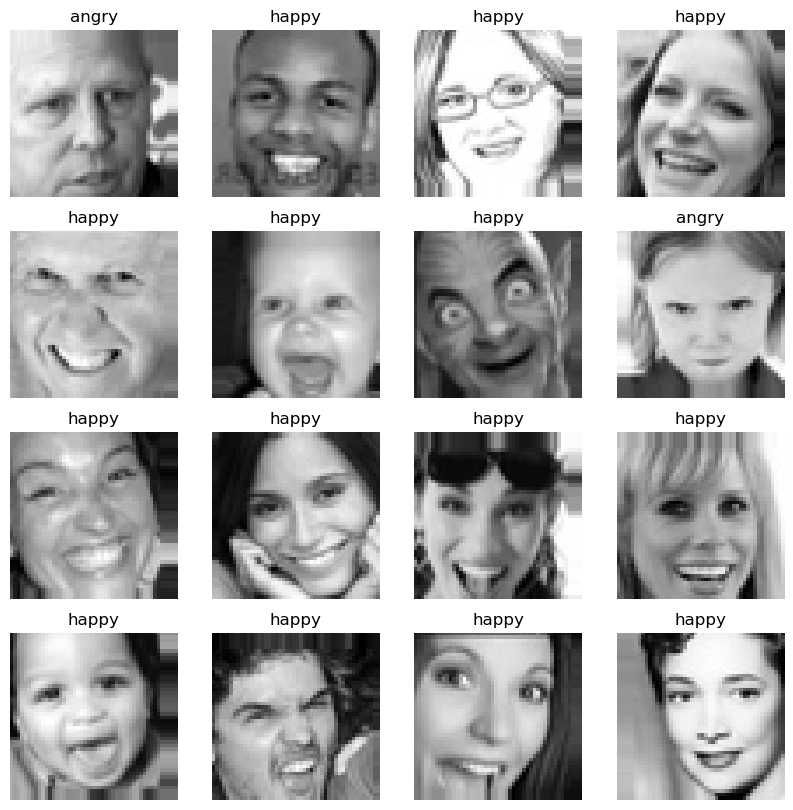

In [6]:
import matplotlib.pyplot as plt

# Get a batch of images and labels from the generator
batch = next(train_generator)

# Display the images in a 4x4 grid with their corresponding labels
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(batch[0][i], cmap='gray') # display the image at index i of the batch on the current axis
    label_idx = batch[1][i].argmax() # get the index of the label for the image at index i of the batch
    label_map = {v:k for k,v in train_generator.class_indices.items()} # create a dictionary mapping the label index to the corresponding label name
    ax.set_title(label_map[label_idx]) # set the title of the current axis to the label name corresponding to the label index
    ax.axis('off') # turn off the axis ticks and labels
    
plt.show() # display the figure

In [7]:
model = Sequential()

# Add a convolutional layer with 32 filters, 3x3 kernel size, and relu activation function
#Input shape has (batch_size, height, width, channels). Incase of RGB image would have a channel of 3 and the greyscale image would have a channel of 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
# Add a batch normalization layer
model.add(BatchNormalization())
# Add a second convolutional layer with 64 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# Add a second batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))
#The Dropout Layer is a regularization technique used in CNN (and other deep learning models) to help prevent overfitting. Overfitting occurs when a
#model demonstrates high performance on the training data but struggles to generalize well to unseen data

# Flatten the output of the convolutional layers
model.add(Flatten())
# Add a dense layer with 256 neurons and relu activation function
model.add(Dense(64, activation='relu'))
# Add a dense layer with 7 neurons (one for each class) and softmax activation function
model.add(Dense(2, activation='sigmoid'))

# Compile the model with categorical cross-entropy loss, adam optimizer, and accuracy metric
model.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

# Model Summary
model.summary()

C:\Users\vaish\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 44, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 44, 44, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,982,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,001,858 (7.64 MB)

 Trainable params: 2,001,666 (7.64 MB)

 Non-trainable params: 192 (768.00 B)

In [8]:
checkpoint_callback = ModelCheckpoint(
    filepath='model.weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

history = model.fit(
    train_generator,
    batch_size=64,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[checkpoint_callback]
)


Epoch 1/10


C:\Users\vaish\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 533ms/step - accuracy: 0.7972 - loss: 0.6581
Epoch 1: val_accuracy improved from -inf to 0.67593, saving model to model.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 23s 705ms/step - accuracy: 0.7974 - loss: 0.6555 - val_accuracy: 0.6759 - val_loss: 0.6596
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.8524 - loss: 0.4550
Epoch 2: val_accuracy did not improve from 0.67593
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 277ms/step - accuracy: 0.8518 - loss: 0.4548 - val_accuracy: 0.6759 - val_loss: 0.6242
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.8373 - loss: 0.4305
Epoch 3: val_accuracy did not improve from 0.67593
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 272ms/step - accuracy: 0.8376 - loss: 0.4304 - val_accuracy: 0.6759 - val_loss: 0.7087
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.8625 - loss: 0.3747
Epoch 4: val_accuracy did not improve from 0.67593
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 279ms/step - accuracy: 0.8627 - loss: 0.3744 -

In [9]:
validation_loss, validation_acc = model.evaluate(validation_generator)
print('Validation loss:', validation_loss, '\t Validation accuracy:', validation_acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.6985 - loss: 0.6005
Validation loss: 0.623081386089325 	 Validation accuracy: 0.7013888955116272


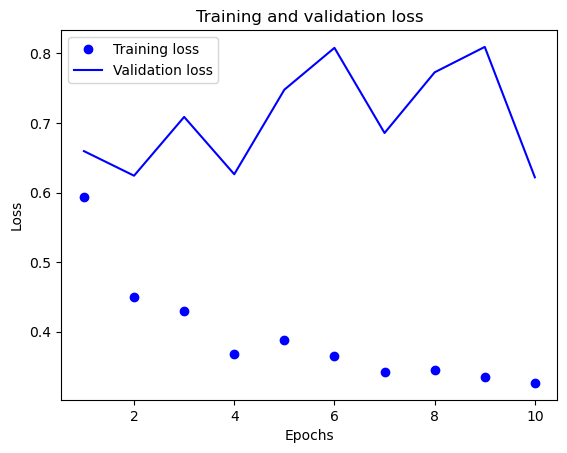

In [10]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

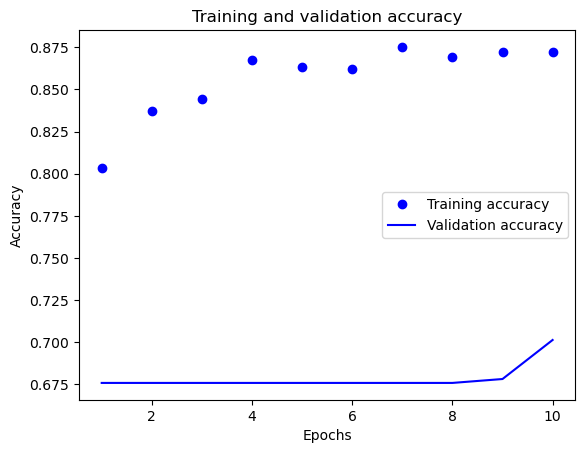

In [11]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


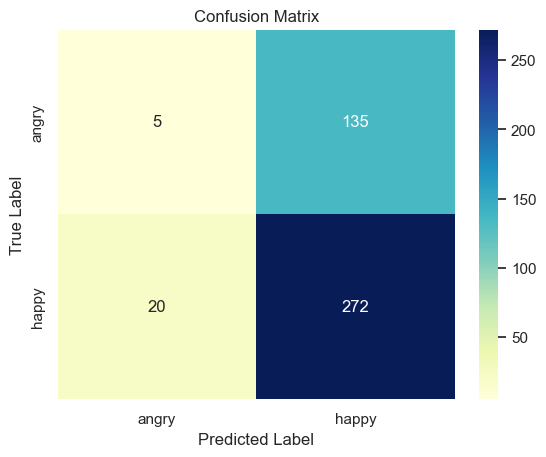

In [12]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix

# Get the true labels and predicted labels for the validation set
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [22]:
img_path = r"P:\Data Science\PGA\Deep Learning\CV Project\CV Project\Computer Vision Project\Dataset\train\happy\67.jpg"
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')  # Load image and resize it to (48, 48) and convert it to grayscale
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension to the array to make it suitable for model input
img_array /= 255.  # Normalize the pixel values between 0 and 1

# Make a prediction
prediction = model.predict(img_array)  # Predict the emotion label for the image

# Get the predicted label
label_map = {v:k for k,v in train_generator.class_indices.items()}  # Map the class indices to the corresponding emotion labels
predicted_label = label_map[np.argmax(prediction)]  # Get the emotion label with the highest predicted probability
print(" Emotion predicted of this image is", predicted_label)  # Print the predicted emotion label


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
 Emotion predicted of this image is happy


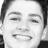

In [23]:
img

In [25]:
img_path = r"P:\Data Science\PGA\Deep Learning\CV Project\images.jpeg"
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')  # Load image and resize it to (48, 48) and convert it to grayscale
img_array = image.img_to_array(img)  # Convert the image to a numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension to the array to make it suitable for model input
img_array /= 255.  # Normalize the pixel values between 0 and 1

# Make a prediction
prediction = model.predict(img_array)  # Predict the emotion label for the image

# Get the predicted label
label_map = {v:k for k,v in train_generator.class_indices.items()}  # Map the class indices to the corresponding emotion labels
predicted_label = label_map[np.argmax(prediction)]  # Get the emotion label with the highest predicted probability
print(" Emotion predicted of this image is", predicted_label)  # Print the predicted emotion label


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
 Emotion predicted of this image is happy
